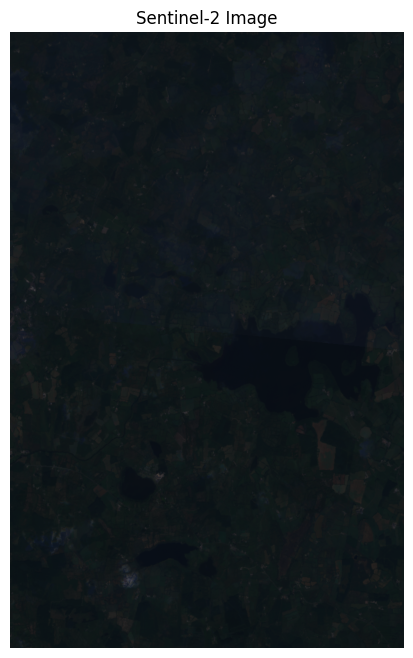

In [1]:
# gee/uk_sentinel2_10m_-7.7909_54.0021.tif, lets visualise this file using rasterio
import rasterio
import matplotlib.pyplot as plt

# Open the file with rasterio
path = 'gee/uk_sentinel2_10m_-7.7909_54.0021.tif'
with rasterio.open(path) as src:
    # Read the data, keep in mind it is rgb
    data = src.read()

    # Display the image
    plt.figure(figsize=(12, 8))
    plt.imshow(data.transpose(1, 2, 0))
    plt.title('Sentinel-2 Image')
    plt.axis('off')
    plt.show()

# Let's predict Land Use values based on .tiff files from Sentinel-2 :D

First, let's load in the .tifs from the satellite data, create an HF dataset and push to hub

In [6]:
import os
import rasterio
import torch
from datasets import Dataset, load_dataset
from tqdm import tqdm
import osmnx as ox
import geopandas as gpd

In [10]:

# Load OSM XML file into a graph
uk_path = "osm_data/united-kingdom-latest.osm"
G = ox.graph_from_xml(uk_path)

# Convert to GeoDataFrames
nodes, edges = ox.graph_to_gdfs(G)

# Now you can use these GeoDataFrames for ML
print(f"Loaded {len(nodes)} nodes and {len(edges)} edges")

# Example: extract features for ML
node_features = nodes[['x', 'y', 'street_count']]  # coordinates and connectivity

KeyboardInterrupt: 

## Load from hub

Let's load from the hub, and remember to shuffle and remove rows ull of zeroes